# Applied Plotting, Charting & Data Representation in Python -- Building an Interactive Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this paper the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the confidence interval -- the range of the number of votes which encapsulates 95% of the data (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). If the bar's confidence interval is below the y value, color the bar blue. If the bar's confidence interval is above the y value, color the bar red. If the bars confidence interval includes the y value then color the bar white. Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see Figure 2d of the paper for more details).

---

In [1]:
import math

import pandas as pd
import numpy as np
from scipy.stats import t

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

%matplotlib notebook

In [2]:
# Use the following data for this assignment:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,2793.851077,105341.500709,-44415.807259,-49859.545652,328367.085875,242510.874946,47436.181512,75761.922925,148853.385142,220465.210458,...,138454.070217,122488.069943,162247.982356,-273907.868554,-138410.570396,27638.756441,-33120.047151,-40989.824866,94532.974507,6128.841097
1993,-44406.485331,180815.466879,-108866.427539,-114625.083717,196807.232582,47161.295355,136522.083654,58826.904901,23329.019613,-96417.638483,...,-37809.868064,93228.910228,108183.379950,146728.060346,-10083.899508,-31300.144215,95017.857057,164071.514663,14409.944591,33298.608969
1994,134288.798913,169097.538334,337957.368420,-76005.273164,90130.207911,8453.626320,-24562.317561,195665.400438,-53475.640770,44708.230667,...,145216.405451,67773.006363,95711.194465,174500.629277,-27821.888075,-57881.583140,26321.525617,-21424.067186,60164.652898,-74750.286614
1995,-44485.202120,-156.410517,-13425.878636,53540.999558,130408.559874,20445.656224,60336.077232,60688.099156,-12748.496722,57150.175074,...,-636.804950,49707.896672,52687.564135,13529.920850,67016.324752,41664.942829,119870.946944,56946.289297,67927.466106,32839.707999


<br>

### Assumptions & Introduction

The data in df would be treated as a random sample from a larger dataset. If it is the population, we don’t need the confidence interval at all. Judging from the way each year's sample is generated, I assume each year's population data are **normally distributed** (though we don't know their mean and standard deviation).        
In this assignment, I'll implement both the **Even Harder Option** and **Hardest Option**. After finding the sample mean and (unbiased) sample SD for each year, I'll utilize the t-distribution to draw the 95% confidence interval for each year's mean. T-distribution is also the basis for finding:
1. the probability of population mean greater than a user-given value, and
2. the probability of population Mean falling in a user-given range.  

You can mouse-click on the first figure to test the implementation of the even harder option. For the hardest option demoed in the second figure, please click, drag and release to see its effect.


<br>
### Personal notes on probability & stats 
<br>
Denote $\bar{X_{n}}$ as sample mean, $\sigma{'} = [\frac{\sum_{i=1}^{n}(X_{i}-\bar{X_{n}})^{2}}{n-1}]^{\frac{1}{2}}$ as the unbiased sample standard deviation, and $\mu$ as the population mean.

1. Given a y value, $P(\mu > y) = P(-\mu < -y) = P[\frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} < \frac{\sqrt{n}\left ( \bar{X_{n}} - y  \right )}{\sigma{'}}].$ If we denote $\frac{\sqrt{n}\left ( \bar{X_{n}} - y  \right )}{\sigma{'}}$ as $\alpha$, then $P(\mu > y) = P[\frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} < \alpha].$ Because $\frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'}$ follows t-distribution with n - 1 degree of freedom and $\alpha$ can be readily calculated, we can compute the probability that the population mean is greater than the given y value. (In the comment of some code later it'll be shown that we don't have to do this manually.)   
    * When $\bar{X_{n}} > y$, we have $\alpha > 0$ and $P > 0.5$, so the sample's bar should be on the red side of the color map. 
    * When $\bar{X_{n}} < y$, we have $\alpha < 0$ and $P < 0.5$, so the sample's bar should be on the blue side of the color map. 
    * When $\bar{X_{n}} = y, P = 0.5$, the color of the bar should be white.         
<br>
2. On the other hand, $P(\mu \leqslant y) = 1 - P(\mu > y) = P[\frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} \geqslant \frac{\sqrt{n}\left ( \bar{X_{n}} - y  \right )}{\sigma{'}}] = P[\frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} \geqslant \alpha].$      
<br> 
3. $P(y_{0} < \mu < y_{1}) = P(-y_{1} < -\mu < -y_{0}) = P[\frac{\sqrt{n}\left ( \bar{X_{n}} - y_{1} \right )}{\sigma{}'} < \frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} < \frac{\sqrt{n}\left ( \bar{X_{n}} - y_{0} \right )}{\sigma{'}}] \overset{denote}{=}P[\alpha < \frac{\sqrt{n}\left ( \bar{X_{n}} - \mu  \right )}{\sigma{}'} < \beta] = T_{(n-1)}(\beta) - T_{(n-1)}(\alpha)$, where $T_{(n-1)}$ is the CDF of the t-distribution with n - 1 degrees of freedom.

<br>
Reference: Ch 8.3-8.5 in Probability and Statistics by Degroot & Schervish 


In [3]:
df['mean'], df['sd'] = df.mean(axis = 1), df.std(axis = 1)
# Differentiat between df.sem and df.std. We get std (normalized by n-1 by default) first and then use it 
# to get sem. The sem returns unbiased standard error of the SAMPLE MEAN (not of the sample itself).
# If we run the following code before generating the mean and sd columns:
# np.sqrt(df.sem(axis = 1)**2 * 3650) 
# 1992    150473.176164
# 1993     88558.520583
# 1994    120317.078777
# 1995     54828.074297
# Exactly the same as df['sd']

# Now use t-distribution to find the 95% confidence interval of the population mean.
cis = t.interval(alpha = 0.95, df = 3650 - 1, loc = df['mean'], scale = df['sd'] / math.sqrt(3650))
df['lower'] = cis[0]
df['upper'] = cis[1]
# Above is the same as:
# c = t.ppf((1 + 0.95)/2, 3650 - 1)
# df['lower'] = df['mean'] - c * df['sd'] / math.sqrt(3650)
# df['upper'] = df['mean'] + c * df['sd'] / math.sqrt(3650)

df


,0,1,2,3,4,5,6,7,8,9,...,3644,3645,3646,3647,3648,3649,mean,sd,lower,upper
1992,2793.851077,105341.500709,-44415.807259,-49859.545652,328367.085875,242510.874946,47436.181512,75761.922925,148853.385142,220465.210458,...,-138410.570396,27638.756441,-33120.047151,-40989.824866,94532.974507,6128.841097,34484.080607,150473.176164,29600.877093,39367.284120
1993,-44406.485331,180815.466879,-108866.427539,-114625.083717,196807.232582,47161.295355,136522.083654,58826.904901,23329.019613,-96417.638483,...,-10083.899508,-31300.144215,95017.857057,164071.514663,14409.944591,33298.608969,39975.673587,88558.520583,37101.744227,42849.602947
1994,134288.798913,169097.538334,337957.368420,-76005.273164,90130.207911,8453.626320,-24562.317561,195665.400438,-53475.640770,44708.230667,...,-27821.888075,-57881.583140,26321.525617,-21424.067186,60164.652898,-74750.286614,37565.689950,120317.078777,33661.121728,41470.258171
1995,-44485.202120,-156.410517,-13425.878636,53540.999558,130408.559874,20445.656224,60336.077232,60688.099156,-12748.496722,57150.175074,...,67016.324752,41664.942829,119870.946944,56946.289297,67927.466106,32839.707999,47798.504333,54828.074297,46019.206176,49577.802490


<br>
### Even Harder Option

In [4]:
# Given a y value, sample mean and sample SD, find the probability of population mean greater than y.
def p_mu_greater_than_y(y, sample_mean, sample_sd):
    p = 1 - t.cdf(y, df = 3650 - 1, loc = sample_mean, scale = sample_sd / math.sqrt(3650))
    # If we use the aforementioned formulas, the critical value (alpha) for t-distribution would be 
    # sqrt(3650) * (sample_mean - y) / sample_sd. But t.cdf() can do the scaling for us, so we don't need 
    # to calculate alpha manually. The following code, we'll get a = p:
    # critical = math.sqrt(3650) * (sample_mean - y) / sample_sd
    # a = t.cdf(critical, df = 3650 - 1 , loc = 0, scale = 1)
    
    return p

<IPython.core.display.Javascript object>


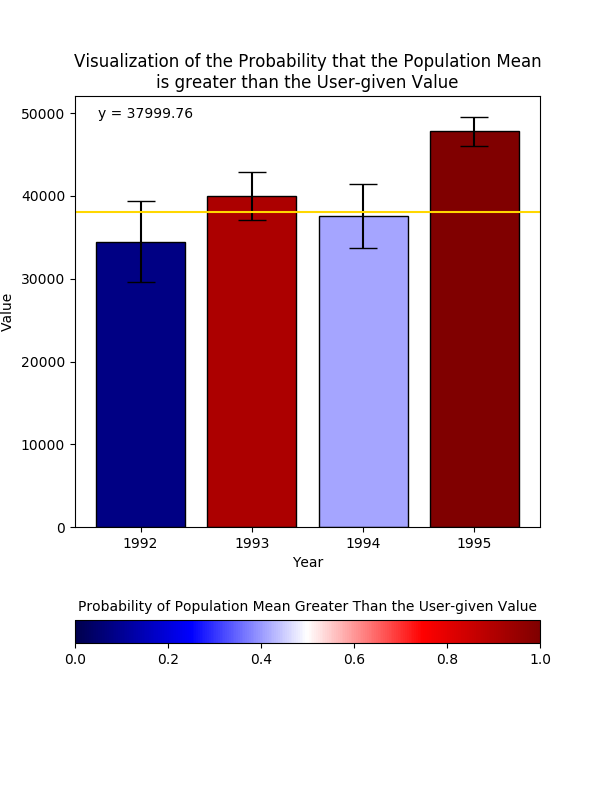

7

In [5]:
# First show the sketch of the data.
plt.figure(figsize = (6, 8))

plt.bar(df.index, df['mean'], yerr = df['upper'] - df['mean'], capsize = 10, color = 'bisque', edgecolor = 'k')
plt.xticks(df.index)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sample Mean and 95% Confidence Interval for 1992-1995 Data')


# Add interaction.
def onclick(event):
    y = event.ydata
    
    # "values" returns the wanted probability for each year.
    values = [p_mu_greater_than_y(y, df['mean'].ix[i], df['sd'].ix[i]) for i in df.index]
    # Convert values to corresponding colors.
    sm = cm.ScalarMappable(norm = Normalize(0, 1), cmap = cm.get_cmap('seismic'))
    colors = sm.to_rgba(values)
    
    plt.cla()
    plt.bar(df.index, df['mean'], yerr = df['upper'] - df['mean'], capsize = 10, color = colors, edgecolor = 'k')
    plt.xticks(df.index)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Visualization of the Probability that the Population Mean\nis greater than the User-given Value')
    
    plt.axhline(y, color = 'gold')
    plt.annotate('y = {}'.format(round(y, 2)), xy = (0.05, 0.95), xycoords = "axes fraction")
    
    # By checking how many axes we find on the plot, we can judge whether or not there is a colorbar. Thereby
    # we can avoid repeatedly adding color bar to the plot.
    if len(plt.gcf().axes) == 1:    
        sm._A = []
        clb = plt.colorbar(sm, orientation = 'horizontal')
        clb.ax.set_title('Probability of Population Mean Greater Than the User-given Value', fontsize = 10)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)



In [6]:
plt.savefig('EvenHarderOption_Feng.pdf')

<br>
### Hardest Option

In [7]:
# The following function returns the probability of population Mean falling in a user-given range.
def mu_in_y_range(y_lower, y_upper, sample_mean, sample_sd):
    p_lower = t.cdf(y_lower, df = 3650 - 1, loc = sample_mean, scale = sample_sd / math.sqrt(3650))
    p_upper = t.cdf(y_upper, df = 3650 - 1, loc = sample_mean, scale = sample_sd / math.sqrt(3650))
    p = p_upper - p_lower
    
    return p

# The above is equivalent to:
# beta = math.sqrt(3650) * (sample_mean - y_lower) / sample_sd
# alpha = math.sqrt(3650) * (sample_mean - y_upper) / sample_sd
# p_manual = t.cdf(beta, df = 3649) - t.cdf(alpha, df = 3649)

<IPython.core.display.Javascript object>


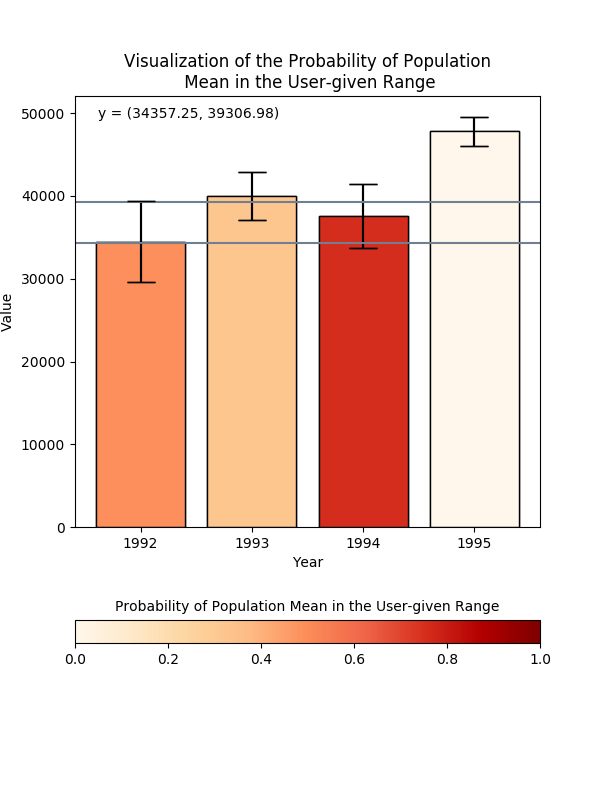

8

In [8]:
# First, show the sketch of the data.
plt.figure(figsize = (6, 8))

plt.bar(df.index, df['mean'], yerr = df['upper'] - df['mean'], capsize = 10, edgecolor = 'k')
plt.xticks(df.index)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sample Mean and 95% Confidence Interval for 1992-1995 Data')


# Second, add the "click-drag-release" interaction. 

# Instantiate a dictionary to store the event.ydata of mouse clicking event. Later we'll use this y value input
# along with the one from mouse releasing event to form the range of y.
global_vars = {'y_start': "Get From y_pressed()"} 
# Or we can define a global y_start within the scope of y_pressed(event).

def y_pressed(event):
    global_vars['y_start'] = event.ydata
    
    # At the beginning of each "click-drag-release" interaction, we clear the pre-existing figure and then
    # plot the original data.
    plt.cla()
    plt.bar(df.index, df['mean'], yerr = df['mean'] - df['lower'], capsize = 10, edgecolor = 'k')
    plt.xticks(df.index)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Visualization of the Probability of Population\n Mean in the User-given Range')
    
    # Add the horizontal line at the first y input value.
    plt.axhline(global_vars['y_start'], color = 'slategray')

    
def y_released(event): 
    y_end = event.ydata
    
    y_lower, y_upper = min(global_vars['y_start'], y_end), max(global_vars['y_start'], y_end)

    values = [mu_in_y_range(y_lower, y_upper, df['mean'].ix[i], df['sd'].ix[i]) for i in df.index]
    sm = cm.ScalarMappable(norm = Normalize(0, 1), cmap = cm.get_cmap('OrRd'))
    colors = sm.to_rgba(values)
    
    # Replot the bars with colormap colors and add the second y input value line.
    plt.bar(df.index, df['mean'], yerr = df['mean'] - df['lower'], capsize = 10, color = colors, edgecolor = 'k')
    plt.axhline(y_end, color = 'slategray')
    
    plt.annotate('y = ({}, {})'.format(round(y_lower, 2), round(y_upper,2)), 
                 xy = (0.05, 0.95), xycoords = "axes fraction")

    # Add the colorbar during the first round of interaction.
    if len(plt.gcf().axes) == 1:    
        sm._A = []
        clb = plt.colorbar(sm, orientation = 'horizontal')
        clb.ax.set_title('Probability of Population Mean in the User-given Range', fontsize = 10)


# Connect the 2 events to the plot.
plt.gcf().canvas.mpl_connect('button_press_event', y_pressed)
plt.gcf().canvas.mpl_connect('button_release_event', y_released)

# Please click the mouse and DRAG IT ACROSS SOME Y RANGE before releasing.


In [10]:
plt.savefig('HardestOption_Feng.pdf')